<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S7_1_Cats_%26_Dogs_SOLUTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cats VS Dogs 

Pour cet exercice de Deep Learning, nous allons créer un CNN simple qui va reconnaitre des chiens et des chats dans un dataset ! 

* Installez Tensorflow 2.0 et importez les librairies : 
  * Tensorflow 
  * Numpy 
  * Pandas 
  * Matplotlib.pyplot

In [0]:
!pip install tensorflow-gpu==2.0.0beta1
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

     |████████████████████████████████| 348.9MB 86kB/s 
     |████████████████████████████████| 3.1MB 27.9MB/s 
     |████████████████████████████████| 501kB 45.2MB/s 


* En utilisant [`tf.keras.utils.get_file()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file) importez le dataset `cats&dogs` via cet url : 

`https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip`

In [0]:
zip_file = tf.keras.utils.get_file("catsNdogs.zip", 
                                   "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip",
                                   cache_subdir="/content", 
                                   extract=True)

* Grâce à la librairie [pathlib](https://docs.python.org/3/library/pathlib.html), stockez dans une variable, le chemin vers votre dossier de train 

In [0]:
import pathlib 
train_set = pathlib.Path("/content/cats_and_dogs_filtered/train")

* Vous avez maintenant accès à tous les dossiers et fichiers contenus dans _train_. Cependant, pour pouvoir lire les fichiers d'images avec Tensorflow, nous avons besoin de convertir chacun des chemins en _string_ et non _posixpath_. Utilisez une [_list comprehension_](https://medium.com/better-programming/list-comprehension-in-python-8895a785550b) pour pouvoir stockez dans une liste, chacun des chemins vers les images de chats et chiens. 

In [0]:
# Convert all paths into a string
all_image_paths = [str(img_path) for img_path in list(train_set.glob("*/*"))]
all_image_paths[:5]

['/content/cats_and_dogs_filtered/train/cats/cat.418.jpg',
 '/content/cats_and_dogs_filtered/train/cats/cat.340.jpg',
 '/content/cats_and_dogs_filtered/train/cats/cat.276.jpg',
 '/content/cats_and_dogs_filtered/train/cats/cat.554.jpg',
 '/content/cats_and_dogs_filtered/train/cats/cat.283.jpg']

* Vous allez avoir besoin de convertir chacun des chemins en [_bytes_](https://en.wikipedia.org/wiki/Byte). Pour cela, utilisez une nouvelle _list comprehension_ qui va cette fois appliquer la méthode [`tf.io.read_file()`](https://www.tensorflow.org/api_docs/python/tf/io/read_file) sur chacun des chemins

In [0]:
# Convert all string path into bytes
all_image_bytes = [tf.io.read_file(path) for path in all_image_paths]

In [0]:
all_image_bytes[0]

<tf.Tensor: id=1, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01\xf4\x01\x90\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc

* Maintenant qu'on a des _bytes_, nous allons pouvoir les convertir en tenseurs. Utilisez à nouveau une _list comprehension_ dans laquelle vous allez appliquer la méthode [`tf.image.decode_jpeg`](https://www.tensorflow.org/s/results/?q=tf.image.decode_jpeg) sur chacun des éléments de votre liste.

In [0]:
# Convert all bytes into a tensor
all_image_tensors = [tf.image.decode_jpeg(img_byte) for img_byte in all_image_bytes]

In [0]:
all_image_tensors[0]

<tf.Tensor: id=4001, shape=(500, 400, 3), dtype=uint8, numpy=
array([[[205, 162, 119],
        [209, 166, 123],
        [187, 145, 103],
        ...,
        [161, 169, 154],
        [162, 171, 154],
        [160, 171, 154]],

       [[201, 158, 115],
        [207, 164, 121],
        [188, 146, 104],
        ...,
        [143, 145, 132],
        [134, 136, 123],
        [130, 132, 118]],

       [[196, 153, 110],
        [205, 162, 119],
        [190, 148, 106],
        ...,
        [131, 120, 114],
        [126, 111, 106],
        [126, 109, 102]],

       ...,

       [[ 47,  42,  20],
        [ 42,  37,  15],
        [ 63,  56,  38],
        ...,
        [131, 105,  78],
        [130, 104,  77],
        [133, 107,  80]],

       [[ 59,  54,  32],
        [ 46,  41,  19],
        [ 67,  60,  42],
        ...,
        [133, 107,  80],
        [133, 107,  80],
        [136, 110,  83]],

       [[ 71,  66,  44],
        [ 51,  46,  24],
        [ 69,  62,  44],
        ...,
        [135

* Voyons si tout fonctionne bien, tentez de visualiser une image via [`plt.imshow()`](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

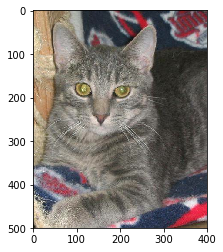

In [0]:
# Visualize an image
plt.imshow(all_image_tensors[0])

* Nous allons cette fois mettre tous les tenseurs dans un [`tf.data.Dataset`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) pour pouvoir manipuler les données et les insérer plus facilement dans un réseau de neurones. Créez donc un `tf.data.Dataset` dans lequel vous mettrez tous les tenseurs d'images que vous avez créer plus haut. 

In [0]:
# Création d'un train set avec uniquement les images d'entrainement
tf_train_set = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [0]:
tf_train_set

<TensorSliceDataset shapes: (), types: tf.string>

* Passons au preprocessing des images et à de la Data Augmentation. Créez une fonction *load_and_preprocess_images* qui prendra un argument _img_ qui sera un chemin vers une image. A l'intérieur de la fonction, _img_ va passer par le preprocessing suivant : 
  * [tf.io.read_file ](https://www.tensorflow.org/api_docs/python/tf/io/read_file)--> Converti le chemin bytes
  * [tf.image.decode_jpeg](https://www.tensorflow.org/api_docs/python/tf/io/decode_jpeg) ---> Converti les bytes en tenseurs 
  * [tf.image.resize](https://www.tensorflow.org/api_docs/python/tf/image/resize_images) ---> Ajuste la taille de toutes les images. On mettra du (192, 192)
  * [tf.image.random_flip_left_right ](https://www.tensorflow.org/api_docs/python/tf/image/random_flip_left_right)---> Applique un effet mirroir sur les images 
  * [tf.image.random_contrast](https://www.tensorflow.org/api_docs/python/tf/image/random_contrast) ---> Applique des effets de contraste aux images 
  * Enfin divisez votre _img_ par 255

In [0]:
# Preprocess the images and data augmentation 
def load_and_preprocess_images(img):
  img = tf.io.read_file(img)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, [192, 192])
  img = tf.image.random_flip_left_right(img)
  img = tf.image.random_contrast(img, 0.50, 0.90)
  img = img / 255.0
  
  return img

* En utilisant la méthode[ `.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map), appliquez votre fonction *load_and_preprocess_images* sur tout votre dataset

In [0]:
# Apply function to the dataset
tf_train_set = tf_train_set.map(load_and_preprocess_images)

* Tentons de voir un exemple de notre dataset pour être sur que tout se soit bien passé. En utilisant, [`tf.take()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take), créez une boucle pour voir une image sous  forme de tenseur. 

In [0]:
# Get an example tensor
for example_tensor in tf_train_set.take(1):
  print(example_tensor)

tf.Tensor(
[[[0.7464488  0.59974545 0.45559546]
  [0.68580943 0.5423799  0.4015037 ]
  [0.68875223 0.55606204 0.41145304]
  ...
  [0.585377   0.58309925 0.5576036 ]
  [0.57332766 0.5725262  0.53183806]
  [0.52730846 0.533056   0.48332506]]

 [[0.7234114  0.579368   0.433888  ]
  [0.70201224 0.5585827  0.41770652]
  [0.6708471  0.537239   0.393089  ]
  ...
  [0.34676543 0.31806868 0.30478993]
  [0.34404162 0.26294237 0.26638234]
  [0.40241957 0.27615643 0.2920777 ]]

 [[0.7178044  0.5875042  0.4368066 ]
  [0.6958483  0.5622402  0.41809016]
  [0.67386514 0.5304357  0.38955942]
  ...
  [0.33624342 0.24620944 0.25468087]
  [0.36300245 0.24952316 0.27722257]
  [0.343421   0.20215565 0.24454457]]

 ...

 [[0.22651951 0.22379567 0.1614909 ]
  [0.3403155  0.3268836  0.26009014]
  [0.4975491  0.4574492  0.39606524]
  ...
  [0.45174778 0.39016354 0.2951689 ]
  [0.4742312  0.41264692 0.31521684]
  [0.47361737 0.41203308 0.31051072]]

 [[0.2374169  0.23086926 0.15874307]
  [0.23018722 0.21033122 0

* Nous allons maintenant nous occuper d'associer un label à chaque tenseur. Pour cela, nous allons passer par plusieurs étapes. 
  * Créez tout d'abord une liste _labels_ qui contiendra le nom des labels `['cats', 'dogs']`. Pour arriver à cela, vous pouvez utiliser 
    * [`path.name`](https://docs.python.org/3/library/pathlib.html#pathlib.PurePath.name)
    * [`path.iterdir()`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.iterdir)

In [0]:
train_set

PosixPath('/content/cats_and_dogs_filtered/train')

In [0]:
# Get image labels 
labels = []
for a in train_set.iterdir():
  labels += [a.name]
  
labels

['cats', 'dogs']

* Nous aurons besoin d'un numéro d'index pour chacun de ces deux labels. Pour cela, nous pouvons faire quelque chose d'assez générique. Nous allons créer un dictionnaire ayant pour clé le nom du label et pour valeur le numéro d'index. 
  * Vous pouvez vous aider de [`enumerate()`](http://book.pythontips.com/en/latest/enumerate.html) pour arriver à vos fins. 

In [0]:
# Get index for both cats and dogs 
label_index = {}

for i, label in enumerate(labels):
  label_index[label]= i
  
label_index  

{'cats': 0, 'dogs': 1}

* Nous avons maintenant à créer une liste d'une longueur égale à votre nombre total d'images contenant tous les labels de chacune des images. Pour arriver cela, créez une _list comprehension_ qui va boucler toutes _posixpath_ d'images et retirez le dossier parent de chacune des images via [`path.parent`](https://docs.python.org/3/library/pathlib.html#pathlib.PurePath.parent). 

In [0]:
# Create lables for each image
all_image_labels = [label_index[path.parent.name] for path in list(train_set.glob("*/*"))]
all_image_labels[:5]

[0, 0, 0, 0, 0]

* Enfin, insérez ces labels dans un `tf.data.Dataset`

In [0]:
# Create a tf.data.Dataset of labels 
tf_labels = tf.data.Dataset.from_tensor_slices(all_image_labels)
for example in tf_labels.take(1):
  print(example)

tf.Tensor(0, shape=(), dtype=int32)


* Nous avons plus qu'à fusionner les deux `tf.data.Dataset` contenant les images et les labels pour avoir un dataset complet. 
  * Pour cela, aidez vous de [`tf.data.Dataset.zip()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#zip)

In [0]:
# Create a full dataset 
full_ds = tf.data.Dataset.zip((tf_train_set, tf_labels))

for example in full_ds.take(1):
  print(example)

(<tf.Tensor: id=6076, shape=(192, 192, 3), dtype=float32, numpy=
array([[[0.64457244, 0.54817516, 0.383744  ],
        [0.6463382 , 0.5499409 , 0.3855098 ],
        [0.6501205 , 0.5537232 , 0.38521177],
        ...,
        [0.56830037, 0.41363198, 0.20819522],
        [0.56512666, 0.4104582 , 0.20933788],
        [0.55947006, 0.40264344, 0.2058395 ]],

       [[0.63876057, 0.5423632 , 0.37793213],
        [0.6374715 , 0.54107416, 0.37664303],
        [0.6456072 , 0.5492098 , 0.38069835],
        ...,
        [0.5652749 , 0.41060644, 0.20516972],
        [0.5602534 , 0.40558496, 0.20446458],
        [0.555333  , 0.3985064 , 0.20170243]],

       [[0.63997465, 0.54357743, 0.37914625],
        [0.6444254 , 0.5480281 , 0.38359693],
        [0.64293134, 0.54653406, 0.37802258],
        ...,
        [0.5588675 , 0.40419903, 0.19876233],
        [0.55752546, 0.40285698, 0.20173664],
        [0.5519563 , 0.39512965, 0.1983257 ]],

       ...,

       [[0.53357136, 0.4350159 , 0.27921754],
   

* Maintenant, nous avons besoin d'effectuer un shuffle de notre dataset et de créer des batch d'images. Effectuez ceci en utilisant : 
  * [`tf.data.Dataset.shuffle`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle)
  * [`tf.data.Dataset.batch`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch)
  
  Attention l'ordre compte ;) 

In [0]:
# Shuffle the dataset & create batchs 
full_ds = full_ds.shuffle(len(all_image_paths)).batch(16)

* Prenez maintenant une dizaine de batch et visualiser la première image de chaque. Pour cela, vous pouvez vous aider de : 

  * [`plt.figure()`](https://matplotlib.org/3.1.0/api/figure_api.html?highlight=figure#module-matplotlib.figure)
  * [`plt.imshow()`](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html?highlight=imshow#matplotlib.pyplot.imshow)
  * [`plt.show()`](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.show.html)
  * [`dataset.take()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take)

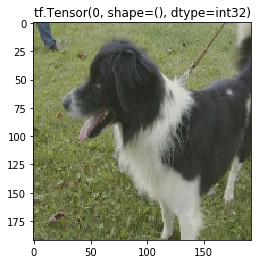

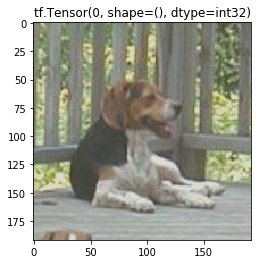

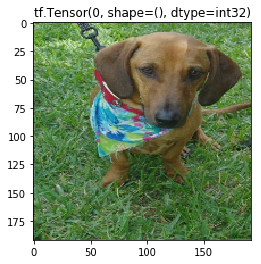

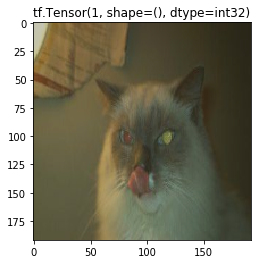

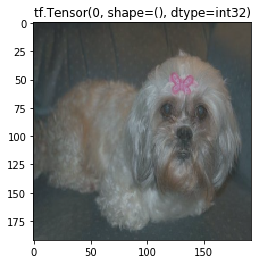

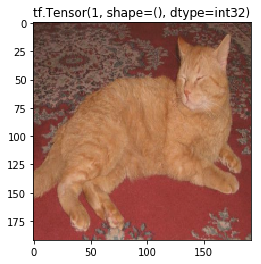

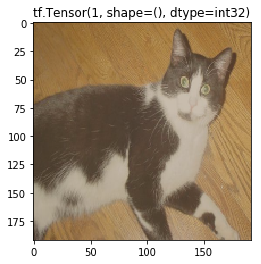

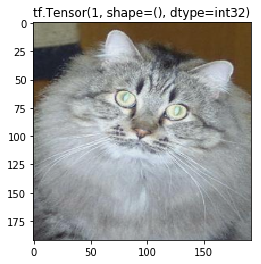

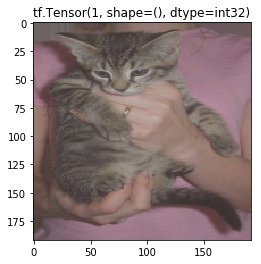

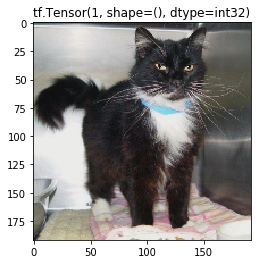

In [0]:
# Visualize some data 
for example_x, example_y in full_ds.take(10):
  plt.figure()
  plt.title(example_y[0])
  plt.imshow(example_x[0].numpy())
  
plt.show()

* Passons maintenant à la création d'un modèle ! Vous allez devoir construire un CNN pour classer chacune des images en chien ou en chat. 
  * En utilisant [`tf.keras.Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) & [`tf.keras.layers`](https://www.tensorflow.org/api_docs/python/tf/keras/layers)
  
  * Pour cet exercice, nous vous conseillons de suivre la structure suivante : 
    * Deux à trois couches Conv2D & MaxPool2D
    * Une couche qui va applatir vos tenseurs (tf.keras.layers.Flatten)
    * Deux à quatre couches Fully Connected (`tf.keras.layers.Dense`)
    * Ajoutez des couches de Dropout pour eviter de l'overfitting.
    * Votre dernière couche devra contenir des fonctions d'activation `sigmoid` pour sortir une probabilité

In [0]:
# Création d'un model 
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[192, 192, 3]),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=32, activation ="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=16, activation ="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

* Mettons en place un `learning_rate` schedule. Ceci va nous permettre de faire baisser le *learning_rate* à mesure que vous entrainez votre modèle. 
  * Tentez d'implémenter un [ExponentialDecay](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) 
  * Vous démarrerez avec un `learning_rate` à 1e-4

In [0]:
# Création d'un schedule learning rate 
initial_learning_rate = 0.0001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=500,
    decay_rate=0.96,
    staircase=True)


* On va maintenant instancier [ `model.compile`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile). 
  * Prenez un optimizer Adam
  * Votre loss sera : `binary crossentropy`
  * Votre metric sera : `binary accuracy`

In [0]:
# Création d'un compileur
model.compile(optimizer = tf.keras.optimizers.Adam(lr_schedule),
              loss= tf.keras.losses.binary_crossentropy,
              metrics = [tf.keras.metrics.binary_accuracy])

* Entrainez votre modèle sur 30 epochs. 
   * ATTENTION : N'oubliez pas de mettre votre Colab en GPU sinon vous allez attendre longtemps ;) 

In [0]:
model.fit(full_ds, epochs=30)

Epoch 1/30
125/125 [==============================] - 12s 93ms/step - loss: 0.6939 - binary_accuracy: 0.5110
Epoch 2/30
125/125 [==============================] - 10s 79ms/step - loss: 0.6922 - binary_accuracy: 0.5080
Epoch 3/30
125/125 [==============================] - 10s 78ms/step - loss: 0.6914 - binary_accuracy: 0.5255
Epoch 4/30
125/125 [==============================] - 10s 79ms/step - loss: 0.6793 - binary_accuracy: 0.5540
Epoch 5/30
125/125 [==============================] - 10s 79ms/step - loss: 0.6714 - binary_accuracy: 0.5510
Epoch 6/30
125/125 [==============================] - 10s 78ms/step - loss: 0.6613 - binary_accuracy: 0.5955
Epoch 7/30
125/125 [==============================] - 10s 79ms/step - loss: 0.6576 - binary_accuracy: 0.6240
Epoch 8/30
125/125 [==============================] - 10s 78ms/step - loss: 0.6424 - binary_accuracy: 0.6510
Epoch 9/30
125/125 [==============================] - 10s 78ms/step - loss: 0.6263 - binary_accuracy: 0.6685
Epoch 10/30
125/125

* Les résultats ont l'air satisfaisant ! Il faudrait qu'on les teste sur nos données de validation. Passez par le même processus de préparation de données que vous avez utilisé pour vos données de test. 

In [0]:
# Préparation des données validation

## Path
valid_set = pathlib.Path("/content/cats_and_dogs_filtered/validation")

In [0]:
# Create string paths for each image
all_val_image_paths = [str(path) for path in list(valid_set.glob("*/*"))]

In [0]:
# Create a valid tf.data.Dataset
tf_valid_set = tf.data.Dataset.from_tensor_slices(all_val_image_paths)

In [0]:
# Preprocess the images and data augmentation 
def load_valid_images(img):
  img = tf.io.read_file(img)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, [192, 192])
  img = img / 255.0
  
  return img

# Preprocess images 
tf_valid_set = tf_valid_set.map(load_valid_images)

In [0]:
# Create labels 
labels = []
for label in valid_set.iterdir():
  labels += [label.name]
  
# Create labels for each image
all_image_labels = [label_index[path.parent.name] for path in list(valid_set.glob("*/*"))]

# Load into a tf.data.Dataset
tf_valid_labels_set = tf.data.Dataset.from_tensor_slices(all_image_labels)

In [0]:
# Create a full dataset 
full_valid_ds = tf.data.Dataset.zip((tf_valid_set, tf_valid_labels_set))
full_valid_ds = full_valid_ds.shuffle(len(all_val_image_paths)).batch(16)

* En utilisant [`model.evaluate`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate), tentez de regarder le score que vous avez. Qu'est ce que vous pouvez conclure ?

In [0]:
model.evaluate(full_valid_ds)

"""
Notre score sur le train est plus élevé que notre score sur le test.
Il semblerait que nous ayons overfitté 
"""

63/63 [==============================] - 3s 49ms/step - loss: 0.5618 - binary_accuracy: 0.7340


[0.5617578682445344, 0.734]

* Tentez de regarder les probabilités des prédictions d'un batch de données. Associez la probabilité à l'image correspondante. 
  * Pour cela, aidez vous de [`model.predict`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


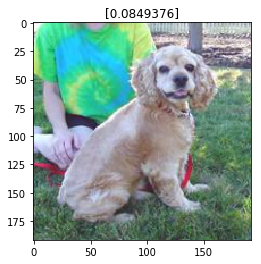

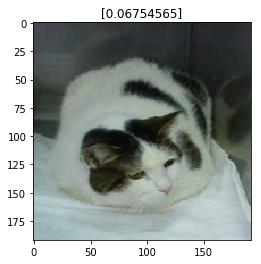

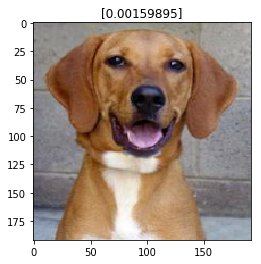

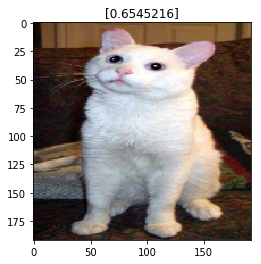

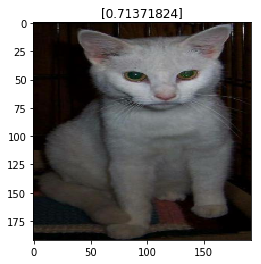

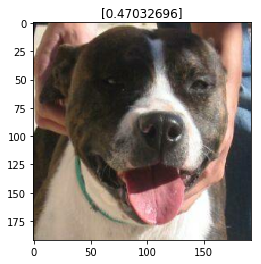

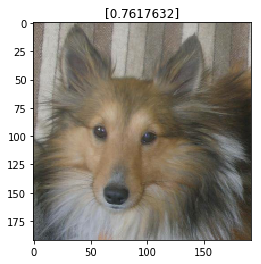

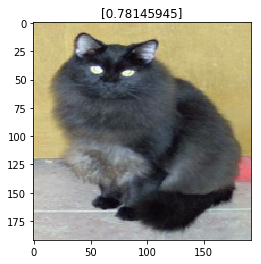

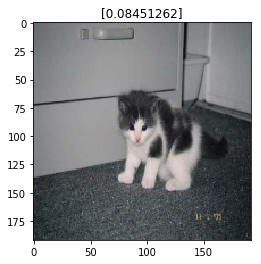

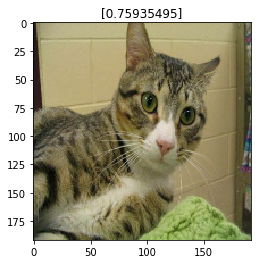

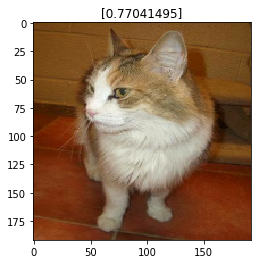

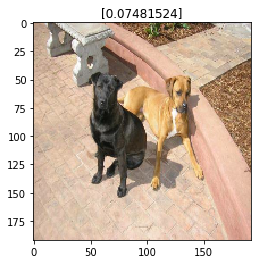

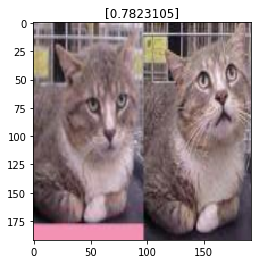

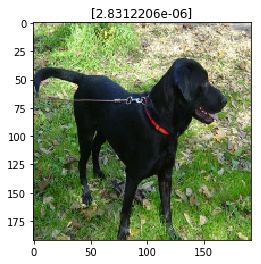

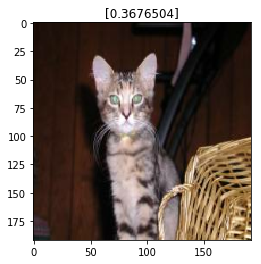

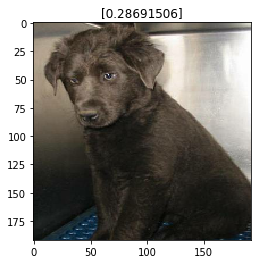

In [0]:
for example in full_valid_ds.take(1):
  y_pred = model.predict(example)
  
  for i in range(len(y_pred)):
    plt.figure()
    plt.title(y_pred[i])
    plt.imshow(example[0][i])
    
plt.show()

* Nous aimerions savoir quelles sont les prédictions sur lesquelles le modèle s'est le plus trompé. Pour cela, nous allons définir une fonction *most_confused* qui bouclera sur tous les batchs de notre dataset de validation et sortira les MAE la plus élevée entre la prédiction et la valeur réelle. 
  * Pour rappel, la MAE (Mean Absolute Error) : `np.abs(y_pred - y_true)`

In [0]:
def most_confused(full_valid_ds, threshold):
  for example, labels in full_valid_ds.take(-1):
    y_pred = model.predict(example)
    mae = np.abs(y_pred.squeeze() - labels.numpy().squeeze())

    for i in np.where(mae>threshold)[0]:
      plt.figure()
      plt.title("prediction: {}\n MAE : {}".format(y_pred[i], mae[i]))
      plt.imshow(example[i])

  plt.show()
  
most_confused(full_valid_ds, 0.8)

* Enfin, nous aimerions créer une matrice de confusion pour voir où le modèle s'est trompé. Cela va se passer en trois étapes : 
  * Créez deux listes vides : `y_true` & `y_pred`
  * Bouclez sur tout votre dataset de validation et ajoutez les prédictions de chaque batch dans `y_pred` et les valeurs réelles dans `y_true`
  * Concaténez via [`tf.concat()`](https://www.tensorflow.org/api_docs/python/tf/concat) chacun items de `y_pred` et `y_true` pour avoir deux listes `y_pred`et `y_true` de longueur 1000. 
  * Insérez `y_pred` et `y_true` dans une matrice de confusion de sklearn. 

In [0]:
y_true = []
y_pred = []
for batch, true_labels in full_valid_ds.take(-1):
  y_true += [true_labels.numpy()]
  y_pred += [model.predict_classes(batch)]

In [0]:
y_true = tf.concat([batch for batch in y_true], axis=0).numpy()
y_pred = tf.concat([batch for batch in y_pred], axis=0).numpy()

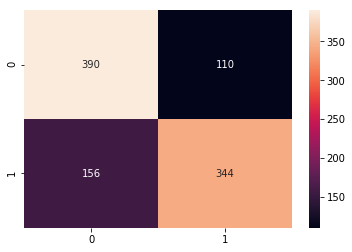

In [0]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns 

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

---> On retrouve bien 73.4% d'accuracy que nous avait montré `model.evaluate`